In [ ]:
#Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Load features data
feat = pd.read_csv("featuresData.csv", na_filter = False)
feat.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Drivetrain,Number of Doors,Market Category,Vehicle Size,Vehicle Style,Highway MPG,City MPG,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335,6,manual,rear wheel drive,2,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300,6,manual,rear wheel drive,2,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300,6,manual,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230,6,manual,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230,6,manual,rear wheel drive,2,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
#Unique brands and models
print("Brands: " + str(set(feat["Make"])))
print("Models: " + str(set(feat["Model"])))

Brands: {'Hyundai', 'Buick', 'Lexus', 'Suzuki', 'Toyota', 'Ford', 'Mitsubishi', 'Mazda', 'Dodge', 'Ferrari', 'BMW', 'Scion', 'Tesla', 'Cadillac', 'Subaru', 'McLaren', 'Lamborghini', 'Nissan', 'Infiniti', 'Volkswagen', 'Genesis', 'Acura', 'Lincoln', 'Bugatti', 'Bentley', 'Audi', 'Alfa Romeo', 'Land Rover', 'Saab', 'Volvo', 'Lotus', 'Mercedes-Benz', 'Chevrolet', 'HUMMER', 'Rolls-Royce', 'Pontiac', 'Chrysler', 'Maybach', 'Honda', 'Maserati', 'FIAT', 'Spyker', 'GMC', 'Kia', 'Porsche', 'Aston Martin'}
Models: {'Cube', 'Camry Solara', 'Crosstrek', 'M5', '458 Italia', 'GS 450h', '4 Series Gran Coupe', 'DB9 GT', 'GS F', 'XC90', 'Levante', 'New Beetle', 'Fit EV', 'Golf Alltrack', 'Discovery Sport', 'Accord Crosstour', 'Entourage', 'Phantom Coupe', 'Highlander', 'Boxster', 'S2000', '3', 'S60 Cross Country', 'GranTurismo', 'S-Class', 'IS 350', 'Corvette', 'Reventon', 'Cayenne', 'Maybach', 'CTS-V Coupe', 'Veloster', 'RX-8', 'TTS', 'SS', 'ATS', 'Mulsanne', 'Exige', 'Continental Flying Spur', 'Encor

There are several unique brands in the dataset and several unique models for each brand. This will be helpful to design the application for a wide range of people from different backgrounds.

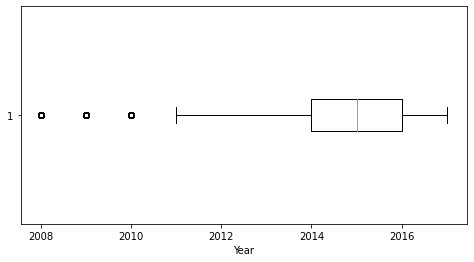


Five Number Summary: [2008.0, 2014.0, 2015.0, 2016.0, 2017.0]


In [ ]:
#Plot Boxplot of Years
plt.rcParams["figure.figsize"] = (8, 4)
plt.xlabel("Year")
plt.boxplot(feat["Year"], vert = False)
plt.show()

#Print Five Number Summary of Years
print("\nFive Number Summary: " + str(list(np.percentile(feat["Year"], [0, 25, 50, 75, 100]))))

Half of the cars in the dataset are from 2015 - 2017 and the other half are from 2008 - 2015. This means that there are more cars from later years, which is good since most users prefer newer cars. When creating the recommendation algorithm, it could also be helpful to penalize cars that are below a certain arbitrary threshold such as 2012.

In [ ]:
#Unique Engine Fuel Types
set(feat["Engine Fuel Type"])

{'diesel',
 'electric',
 'flex-fuel (premium unleaded recommended/E85)',
 'flex-fuel (premium unleaded required/E85)',
 'flex-fuel (unleaded/E85)',
 'flex-fuel (unleaded/natural gas)',
 'natural gas',
 'premium unleaded (recommended)',
 'premium unleaded (required)',
 'regular unleaded'}

There are several unique fuel types for the cars in the dataset. When creating the recommendation algorithm, I will most likely look for keywords such as "flex-fuel", "premium", "regular", etc to assign points to each car accordingly and group the keywords into the fuel categories of the preferences dataset appropriately.

In [ ]:
#Unique Transmission Types
set(feat["Transmission Type"])

{'automated manual', 'automatic', 'direct drive', 'manual'}

Automatic and Manual cars are well known transmission types. For clarification, Direct Drive is the transmission type for electric cars and Automated Manual is a unique transmission type where the gear stick is similar to that of a Manual car, but there is no clutch. When creating the recommendation algorithm, I could possibly penalize cars with Manual or Automatic Manual transmission types as they are not widely used anymore.

In [ ]:
#Unique Drivetrains
set(feat["Drivetrain"])

{'all wheel drive',
 'four wheel drive',
 'front wheel drive',
 'rear wheel drive'}

For clarification, four wheel drive is similar to all wheel drive but four wheel drive is especially useful for users interested in off-roading or driving on rugged terrain.

In [ ]:
#Unique Market Categories
set(",".join(feat["Market Category"]).split(","))

{'Crossover',
 'Diesel',
 'Exotic',
 'Factory Tuner',
 'Flex Fuel',
 'Hatchback',
 'High-Performance',
 'Hybrid',
 'Luxury',
 'N/A',
 'Performance'}

There are several unique market categories and I will most likely look for certain keywords such as "Luxury" and "High-Performance" to reward certain cars accordingly.

In [ ]:
#Unique Vehicle Sizes
set(feat["Vehicle Size"])

{'Compact', 'Midsize/Large'}

The reason I joined the separate "Midsize" and "Large" sizes into one "Midsize/Large" size is to match the sizes in the preferences dataset, which I will be using to determine the specifics of the scoring system in the recommendation algorithm.

In [ ]:
#Unique Vehicle Styles
set(feat["Vehicle Style"])

{'2 Door Hatchback',
 '2 Door SUV',
 '4 Door Hatchback',
 '4 Door SUV',
 'Convertible',
 'Convertible SUV',
 'Coupe',
 'Crew Cab Pickup',
 'Extended Cab Pickup',
 'Passenger Minivan',
 'Regular Cab Pickup',
 'Sedan',
 'Station Wagon'}

There are several unique vehicle styles and I will reward and penalize certain cars based on the user's attributes. For example, I will most likely reward passenger minivans for a user who has a large household.

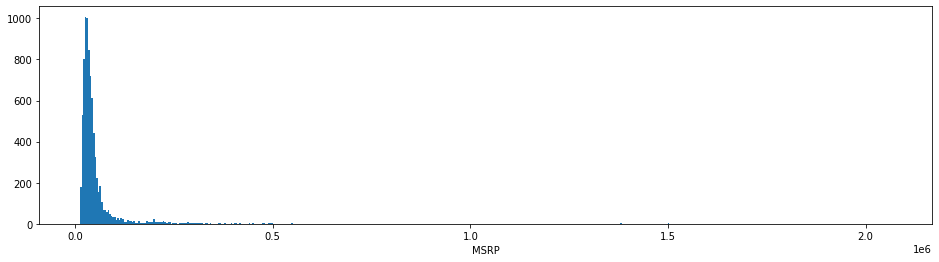


Five Number Summary: [11965.0, 26298.0, 35000.0, 48100.0, 2065902.0]


In [ ]:
#Plot Histogram of MSRPs
plt.rcParams["figure.figsize"] = (16, 4)
plt.xlabel("MSRP")
plt.hist(feat["MSRP"], bins = 500)
plt.show()

#Print Five Number Summary of MSRPs
print("\nFive Number Summary: " + str(list(np.percentile(feat["MSRP"], [0, 25, 50, 75, 100]))))

The distribution of MSRPs is heavily skewed to the right and the median price almost perfectly matches the true median price of a new car in the United States, which indicates that the dataset represents most cars in the United States very well. To ensure that the algorithm doesn't recommend an insanely expensive car to any user, I will add a filtering function where all cars costing more than a selected maximum price will be removed.

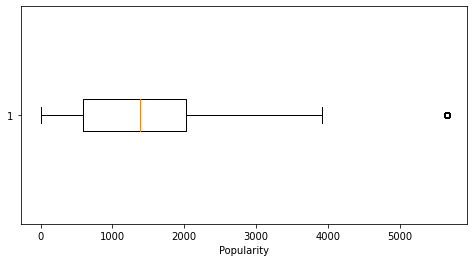


Five Number Summary: [2.0, 586.0, 1385.0, 2031.0, 5657.0]


In [ ]:
#Plot Boxplot of Popularity values
plt.rcParams["figure.figsize"] = (8, 4)
plt.xlabel("Popularity")
plt.boxplot(feat["Popularity"], vert = False)
plt.show()

#Print Five Number Summary of Popularity values
print("\nFive Number Summary: " + str(list(np.percentile(feat["Popularity"], [0, 25, 50, 75, 100]))))

The distribution of popularity values are also skewed to the right and I will reward cars based on how popular they are when developing the scoring algorithm.

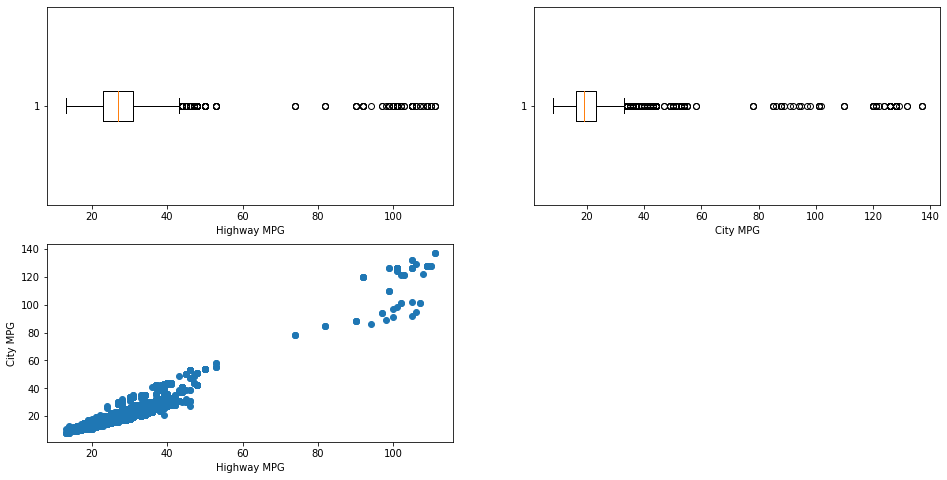


Five Number Summary (Highway MPG): [13.0, 23.0, 27.0, 31.0, 111.0]

Five Number Summary (City MPG): [8.0, 16.0, 19.0, 23.0, 137.0]


In [ ]:
plt.rcParams["figure.figsize"] = (16, 8)

#Plot Boxplot of Highway MPG values
plt.subplot(221)
plt.xlabel("Highway MPG")
plt.boxplot(feat["Highway MPG"], vert = False)

#Plot Boxplot of City MPG values
plt.subplot(222)
plt.xlabel("City MPG")
plt.boxplot(feat["City MPG"], vert = False)

#Plot Scatterplot of Highway MPG values VS City MPG values
plt.subplot(223)
plt.xlabel("Highway MPG")
plt.ylabel("City MPG")
plt.scatter(feat["Highway MPG"], feat["City MPG"])

plt.show()

#Print Five Number Summary of Highway MPG values
print("\nFive Number Summary (Highway MPG): " + str(list(np.percentile(feat["Highway MPG"], [0, 25, 50, 75, 100]))))

#Print Five Number Summary of City MPG values
print("\nFive Number Summary (City MPG): " + str(list(np.percentile(feat["City MPG"], [0, 25, 50, 75, 100]))))

Excluding outliers, both the Highway MPG values and City MPG values are approximately normally distributed with the City MPG values being lower in general due to more of a stop and go traffic pattern in cities. 

In the scoring algorithm, I will reward cars with higher mileages and penalize cars with lower mileages.

In [ ]:
#Function to remove "N/A" values from either one or two lists
def removeNA(numLists, inputLists):
  if numLists == 1:
    return [elem for elem in inputLists[0] if elem != "N/A"]
  else:
    returnLists = [[], []]
    for i in range(len(feat)):
      if inputLists[0][i] != "N/A" and inputLists[1][i] != "N/A":
        returnLists[0].append(inputLists[0][i])
        returnLists[1].append(inputLists[1][i])
    return returnLists

This function is created for the Engine HP, Engine Cylinders, and Number of Doors columns, which all have some N/A values.

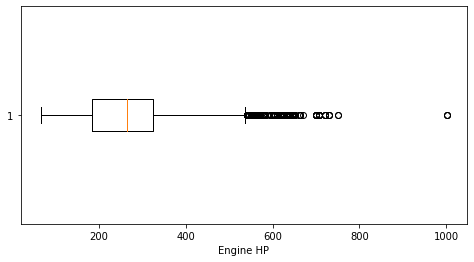


Five Number Summary: [66.0, 184.0, 265.0, 325.0, 1001.0]


In [ ]:
engineHP = list(map(int, removeNA(1, [feat["Engine HP"]])))

#Plot Boxplot of Engine HP values
plt.rcParams["figure.figsize"] = (8, 4)
plt.xlabel("Engine HP")
plt.boxplot(engineHP, vert = False)
plt.show()

#Print Five Number Summary of Engine HP values
print("\nFive Number Summary: " + str(list(np.percentile(engineHP, [0, 25, 50, 75, 100]))))

In general, the Engine HP values are skewed to the right and there are a lot of outliers, which are mostly luxury sport cars.

In [ ]:
#Print the Correlation Coefficient for Engine Cylinders and Engine HP
temp = removeNA(2, [feat["Engine Cylinders"], feat["Engine HP"]])
print("Correlation Coefficient between Engine Cylinders and Engine HP: " + str(np.corrcoef(list(map(int, temp[0])), list(map(int, temp[1])))[0][1]))

#Print the Correlation Coefficient for Engine HP and Number of Doors
temp = removeNA(2, [feat["Engine HP"], feat["Number of Doors"]])
print("\nCorrelation Coefficient between Engine HP and Number of Doors: " + str(np.corrcoef(list(map(int, temp[0])), list(map(int, temp[1])))[0][1]))

#Print the Correlation Coefficient for Engine HP and Highway MPG
temp = removeNA(2, [feat["Engine HP"], feat["Highway MPG"]])
print("\nCorrelation Coefficient between Engine HP and Highway MPG: " + str(np.corrcoef(list(map(int, temp[0])), list(map(int, temp[1])))[0][1]))

Correlation Coefficient between Engine Cylinders and Engine HP: 0.8644794639449834

Correlation Coefficient between Engine HP and Number of Doors: -0.27294134515676677

Correlation Coefficient between Engine HP and Highway MPG: -0.5970349269938005


1. As the number of engine cylinders in a car increases, so does the horsepower (strong correlation).
2. As the engine horsepower of a car goes up, the number of doors go down (weak correlation). This is because luxury sport cars that have very powerful engines mostly have two doors instead of four.
3. As the engine horsepower of a car goes up, the mileage goes down (moderate correlation). Luxury sport cars with powerful cars are almost always gas guzzlers.
<br /><br />
I could use this information to penalize cars with very powerful engines and low mileages or vica versa depending on the user's attributes.